# Conductive heat flow along infinite 1D line

Analytical solution:

\begin{equation}
T(x,t) = \frac{T_l + T_r}{2} + \frac{T_r - T_l}{2} erf\left(\frac{x}{2\sqrt{\alpha t}}\right)
\end{equation}

Initial conditions:

\begin{align*}
T_l = 300 K \\ 
T_r = 400 K \\
\end{align*}


## Exercises:
1. Please implement the analytical solution in the cell above.
2. Please test the analytical solution for different temperatures $T_l$ and $T_r$, times $t$ and temperature diffusivities $\alpha$. 

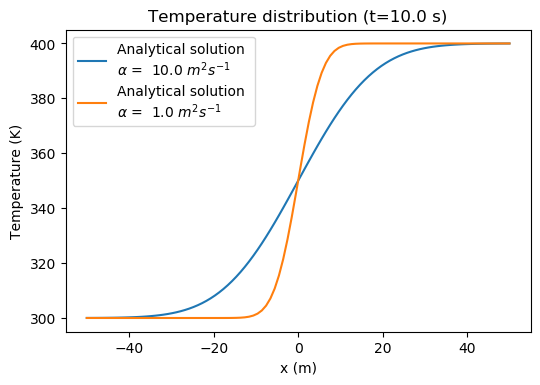

In [1]:
'''
    Analytical solution of conductive heat transport equation along
    of infinite 1D line
    t: time (s)
    x: Location coordinate (m)
    alpha: Thermal diffusivity (m^2/s)
    T_i: Temperature at location i (K)
    T(x,t): Analytical function
    
    # --> Exercise (please read and complete)
'''


import numpy                     # Load numpy library
from scipy import special        # Load 'special' method from scipy library
                                 # (contains vectorized erf(x) function)
from matplotlib import pyplot    # Load matplotlib library
# Show matplotlib plots in notebook
%matplotlib inline               

"""
Analytical solution of conductive heat transport equation along
of infinite 1D line:
# --> Please enter equation in comment line below (pocket calculator format)
T(x,t) = (T_l + T_r)/2 + (T_r - T_l)/2 * erf(x/(2*sqrt(alpha*t)))
"""

def Temp(x):
    # --> Please complete the following line, using the methods
    # special.erf() and numpy.sqrt() for your calculation 
    return (T_l + T_r)/2 + (T_r - T_l)/2 * \
        special.erf(x/(2*numpy.sqrt(alpha*t)))

# time t 
t = 10. # s

# thermal diffusivity alpha 
alpha = 10. # m^2/s

# Initial conditions 
# --> Please complete the following two lines
T_l = 300 # K 
T_r = 400 # K

# 1D array for x-coordinates
x = numpy.linspace(-50, 50, 100)

# Visualization of results
fig = pyplot.figure(dpi=100)
pyplot.plot(x, Temp(x), label='Analytical solution \n'+r'$\alpha$ =  '+str(alpha)+r' $m^2s^{-1}$')
alpha = 1.
pyplot.plot(x, Temp(x), label='Analytical solution \n'+r'$\alpha$ =  '+str(alpha)+r' $m^2s^{-1}$')
pyplot.title('Temperature distribution (t='+str(t)+' s)')
pyplot.xlabel('x (m)');
pyplot.ylabel('Temperature (K)');
pyplot.legend();

# Numerical realization by means of Finite Difference Method

1D conductive heat transport equation:
\begin{equation*}
\frac{\partial T}{\partial t} = \alpha \frac{\partial ^2T}{\partial x^2}
\end{equation*}

FDM formulation of conductive heat transport equation:
\begin{equation*}
T^{n+1}_i = T^{n}_i  + \alpha \frac{\Delta t}{\Delta x^2} (T^{n}_{i+1} -2T^{n}_i + T^{n}_{i-1})
\end{equation*}

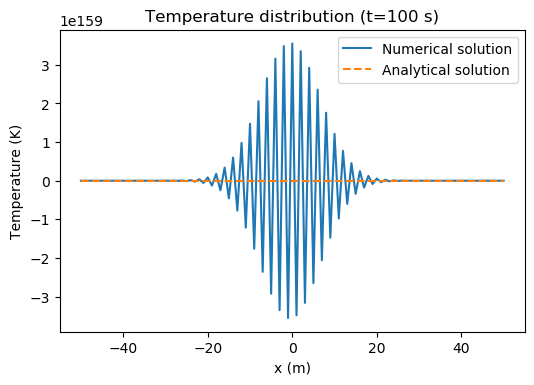

In [19]:
'''
    Numerical solution of conductive heat transport equation along
    of infinite 1D line by means of finite difference method

    Variables:
    lx: Model length (m)
    nx: Numer of nodes (-)
    dx: Element length (m)
    t: Time (s)
    nt: Number of time steps
    T: Temperature array for time n+1 (K)
    Tn: Temperature array for time n (K)
    alpha: Thermal diffusivity (m^2/s)
'''


import numpy                     # Load numpy library 
from matplotlib import pyplot    # Load matplotlib library
# Show matplotlib plots in notebook
%matplotlib inline               

# Model parametrization and discretization in time and space
lx = 100           # Model length (m)
nx = 101           # 101 nodes and 100 elements
dx = lx / (nx - 1) # Element length (m)
nt = 100           # Number of time steps (-)
alpha = 10.0        # Thermal diffusivity (m^2/s)
dt = 1           # Time step size (s)
t = nt * dt        # Time calculation for analytical solution (comparison)


T = numpy.ones(nx)       # Generate numpy array with nx elements of value 1
                         # to store calculation results for time step n+1
Tn = numpy.ones(nx)      # Generate numpy array with nx elements of value 1
                         # to store results for time step n
    
# Initial conditions (temperature)
T[0:int(lx/2 / dx)] = 300  # Initial condition (IC): nodes 0-49: T=300 K
T[int(lx/2 / dx)::] = 400  # Initial condition (IC): nodes 50-end: T=400 K

for n in range(nt):  # Loop through number of time steps nt
    Tn = T.copy()    # Copy previous T distribution to Tn array
    for i in range(1, nx - 1): # Loop through all nodes (0,101)
        # --> Please complete the FDM discretization of heat equation below
        T[i] = Tn[i] + alpha * dt / dx**2 * (Tn[i+1] - 2 * Tn[i] + Tn[i-1])

# Visualization of results
fig = pyplot.figure(dpi=100)

pyplot.plot(numpy.linspace(-50, 50, nx), T, label='Numerical solution');
pyplot.plot(x, Temp(x), label='Analytical solution', linestyle='--');
pyplot.title('Temperature distribution (t='+str(t)+' s)');
pyplot.xlabel('x (m)');
pyplot.ylabel('Temperature (K)');
pyplot.legend();


## Exercises:
1. Please extend the documentation by all variables used in this exercise.
2. Please complete the code by entering all missing initial conditions and equations.
3. Compare the numerical and analytical solutions. When and why do we experience deviations in the results?
4. Why do we obtain higher deviations at longer simulation times $t$? How can we reduce these deviations?
5. What role does the time step size $dt$ play? Please test different values for $dt$.